<center><h1 style="color:#173F8A;"> Metodos para Ecuaciones Diferenciales, IMT3410, 2022-2 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

<h2 style="color:#03122E;text-align:center;"> Capitulo 4. Metodos para Leyes de Conservacion<br> </h2>
<h3 style="color:#03122E;text-align:center;">             Diferencia finitas para adveccion <br> </h3>
<hr style="border:3px solid #E3AE00 "> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [2]:
def problem_advection_1():
    x0 = 0
    xN = 1.0
    a = 1.0
    u0 = lambda x: np.sin(2*np.pi*x)
    return [x0,xN], a, u0


In [19]:
def method_1(N,I, a, u0, T=1):
    xper = np.linspace(I[0], I[1], N, endpoint=False)
    h = (I[1]-I[0])/(N+1)
    
    M = 10
    dt = h/a*0.5
    U = []
    #T = 15*dt
    U0 = u0(xper); U.append(U0)
    
    t = 0
    tiempo = []; tiempo.append(t)
    while t+dt/2 < T:
        Unext = np.zeros(N,dtype=np.float64)
        # j = 0
        Unext[0] = U0[0] - (dt*a/2/h)*(U0[1]-U0[N-1])
        for j in range(1,N-1):
            Unext[j] = U0[j] - (dt*a/2/h)*(U0[j+1]-U0[j-1])
        # j =N-1
        Unext[N-1] = U0[N-1] - (dt*a/2/h)*(U0[0]-U0[N-2])
        U.append(Unext)
        t += dt
        tiempo.append(t)
        U0 = Unext
    return U,xper, tiempo

In [20]:
I, a, u0 = problem_advection_1()
U, x, tiempo = method_1(100, I, a, u0, T = 2.2)
M = len(U)
print(M)

445


<IPython.core.display.Javascript object>


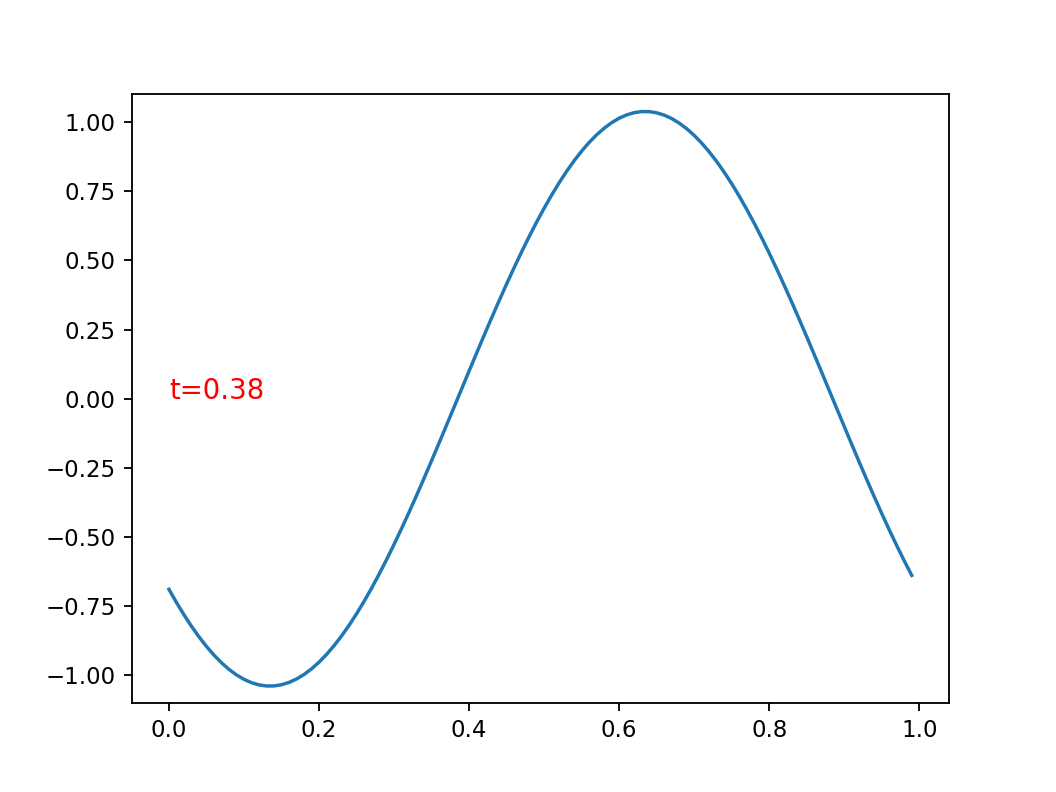

In [21]:
%matplotlib notebook
import matplotlib.animation as animation
fig, ax = plt.subplots()

line, = ax.plot(x, U[0])
string = 't=0'
label = ax.text(0, 0, string, fontsize=12, color="Red")

def animate(i):
    line.set_ydata(U[i])  # update the data
    label.set_text('t=%1.2f'%(tiempo[i]))
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(U[0])
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, M), init_func=init,
                              interval=25, blit=True)
plt.show()

In [37]:
def Leap_frog(N,I, a, u0, T=1, CFL=0.8): # para Adveccion
    xper = np.linspace(I[0], I[1], N, endpoint=False)
    h = (I[1]-I[0])/(N+1)
    
    dt = CFL*h/a
    U = []; U0 = u0(xper); U.append(U0)
    
    t = 0
    tiempo = []; tiempo.append(t)
    # first t = dt
    U1 = u0(xper-a*dt)
    U.append(U1)
    while t+dt/2 < T:
        Unext = np.zeros(N,dtype=np.float64)
        # j = 0
        Unext[0] = U0[0] - (dt*a/h)*(U1[1]-U1[N-1])
        for j in range(1,N-1):
            Unext[j] = U0[j] - (dt*a/h)*(U1[j+1]-U1[j-1])
        # j =N-1
        Unext[N-1] = U0[N-1] - (dt*a/h)*(U1[0]-U1[N-2])
        U.append(Unext)
        t += dt
        tiempo.append(t)
        U0 = U1
        U1 = Unext
    return U,xper, tiempo

In [130]:
I, a, u0 = problem_advection_1()
U, x, tiempo = Leap_frog(100,I, a, u0, T=3)

<IPython.core.display.Javascript object>


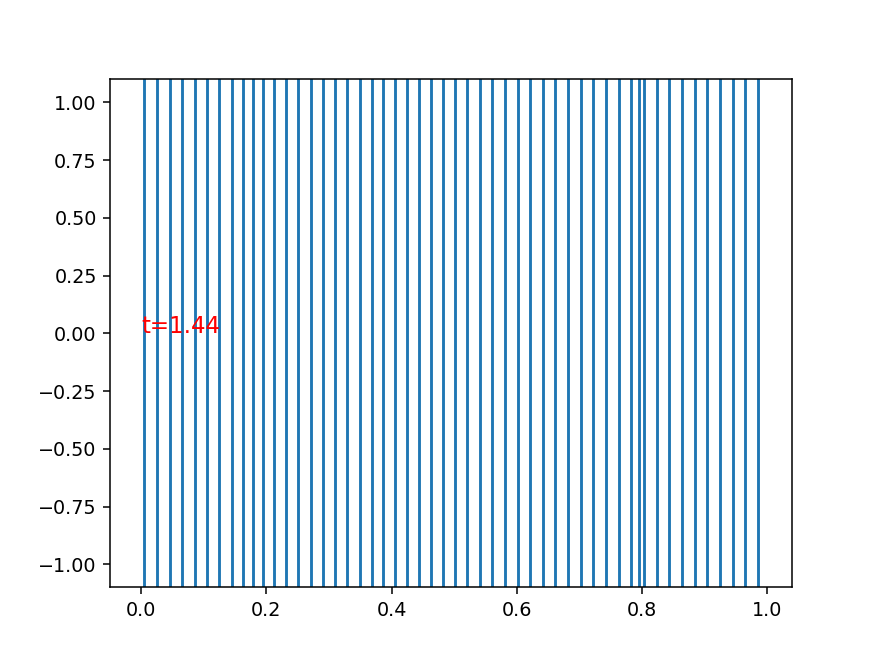

In [131]:
%matplotlib notebook
import matplotlib.animation as animation
fig, ax = plt.subplots()

line, = ax.plot(x, U[0])
string = 't=0'
label = ax.text(0, 0, string, fontsize=12, color="Red")

def animate(i):
    line.set_ydata(U[i])  # update the data
    label.set_text('t=%1.2f'%(tiempo[i]))
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(U[0])
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, M), init_func=init,
                              interval=25, blit=True)
plt.show()

In [7]:
def Lax_Friedrichs(N,I, a, u0, T=1, CFL=0.8):
    xper = np.linspace(I[0], I[1], N, endpoint=False)
    h = (I[1]-I[0])/(N+1)
    
    M = 10
    dt = CFL*h/a
    U = []
    #T = 15*dt
    U0 = u0(xper); U.append(U0)
    
    t = 0
    tiempo = []; tiempo.append(t)
    while t+dt/2 < T:
        Unext = np.zeros(N,dtype=np.float64)
        # j = 0
        Unext[0] = 0.5*(U0[1]+U0[N-1]) - (dt*a/2/h)*(U0[1]-U0[N-1])
        for j in range(1,N-1):
            Unext[j] = 0.5*(U0[j+1]+U0[j-1]) - (dt*a/2/h)*(U0[j+1]-U0[j-1])
        # j =N-1
        Unext[N-1] = 0.5*(U0[0]+U0[N-2]) - (dt*a/2/h)*(U0[0]-U0[N-2])
        U.append(Unext)
        t += dt
        tiempo.append(t)
        U0 = Unext
    return U,xper, tiempo

In [38]:
def Lax_Wendroff(N,I, a, u0, T=1, CFL=0.8):
    xper = np.linspace(I[0], I[1], N, endpoint=False)
    h = (I[1]-I[0])/(N+1)
    
    M = 10
    dt = CFL*h/a
    U = []
    #T = 15*dt
    U0 = u0(xper); U.append(U0)
    
    t = 0
    tiempo = []; tiempo.append(t)
    while t+dt/2 < T:
        Unext = np.zeros(N,dtype=np.float64)
        # j = 0
        Unext[0] = 0.5*(U0[1]+U0[N-1]) - (dt*a/2/h)*(U0[1]-U0[N-1])
        for j in range(1,N-1):
            Unext[j] = 0.5*(U0[j+1]+U0[j-1]) - (dt*a/2/h)*(U0[j+1]-U0[j-1]) + dt**2*a/h**2*(U0[j+1]-2*U0[j]+U0[j-1])
        # j =N-1
        Unext[N-1] = 0.5*(U0[0]+U0[N-2]) - (dt*a/2/h)*(U0[0]-U0[N-2])+ dt**2*a/h**2*(U0[0]-2*U0[N-1]+U0[N-2])
        U.append(Unext)
        t += dt
        tiempo.append(t)
        U0 = Unext
    return U,xper, tiempo

In [39]:
def Upwind(N,I, a, u0, T=1, CFL=0.8):
    xper = np.linspace(I[0], I[1], N, endpoint=False)
    h = (I[1]-I[0])/(N+1)
    
    dt = CFL*h/a
    U = []
    U0 = u0(xper); U.append(U0)
    
    t = 0
    tiempo = []; tiempo.append(t)
    while t+dt/2 < T:
        Unext = np.zeros(N,dtype=np.float64)
        # j = 0
        Unext[0] = U0[0] - (dt*a/h)*(U0[0]-U0[N-1])
        for j in range(1,N-1):
            Unext[j] = U0[j] - (dt*a/h)*(U0[j]-U0[j-1])
        # j =N-1
        Unext[N-1] = U0[N-1] - (dt*a/h)*(U0[N-1]-U0[N-2])
        U.append(Unext)
        t += dt
        tiempo.append(t)
        U0 = Unext
    return U,xper, tiempo

In [40]:
I, a, u0 = problem_advection_1()
U, x, tiempo = Lax_Friedrichs(100,I, a, u0, T=3)

NameError: name 'Lax_Friedrichs' is not defined

<IPython.core.display.Javascript object>


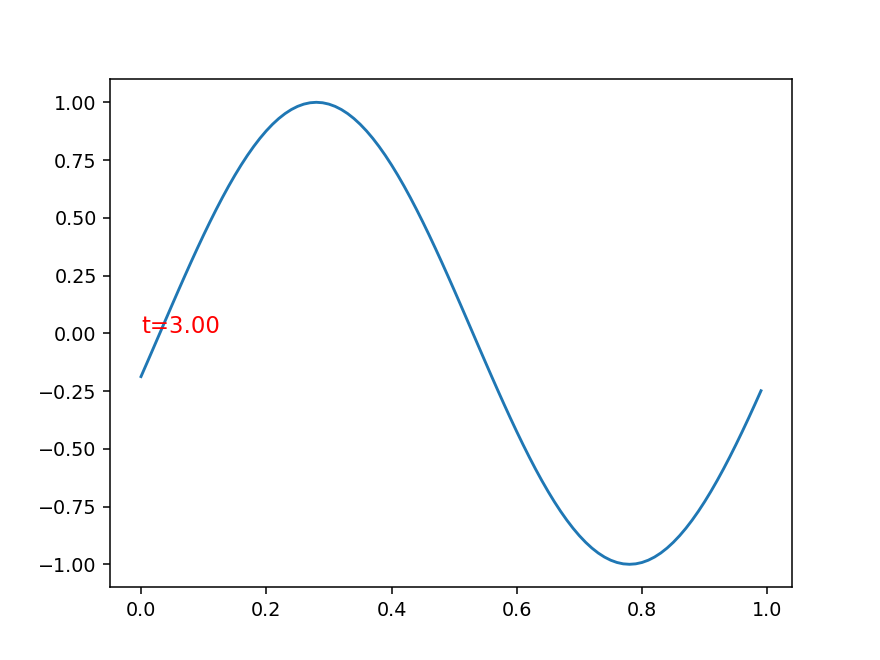

In [134]:
%matplotlib notebook
import matplotlib.animation as animation
fig, ax = plt.subplots()

line, = ax.plot(x, U[0])
string = 't=0'
label = ax.text(0, 0, string, fontsize=12, color="Red")

def animate(i):
    line.set_ydata(U[i])  # update the data
    label.set_text('t=%1.2f'%(tiempo[i]))
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(U[0])
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, M), init_func=init,
                              interval=25, blit=True)
plt.show()

# Problem 2:

In [3]:
def problem_advection_2():
    x0 = 0
    xN = 25.0
    a = 1.0
    u0 = lambda x: np.exp(-20*(x-2)**2) + np.exp(-(x-5)**2)
    return [x0,xN], a, u0

In [41]:
I, a, u0 = problem_advection_2()

U, x, tiempo = Leap_frog(1250,I, a, u0, T=17, CFL=0.8)
M = 1065

<IPython.core.display.Javascript object>


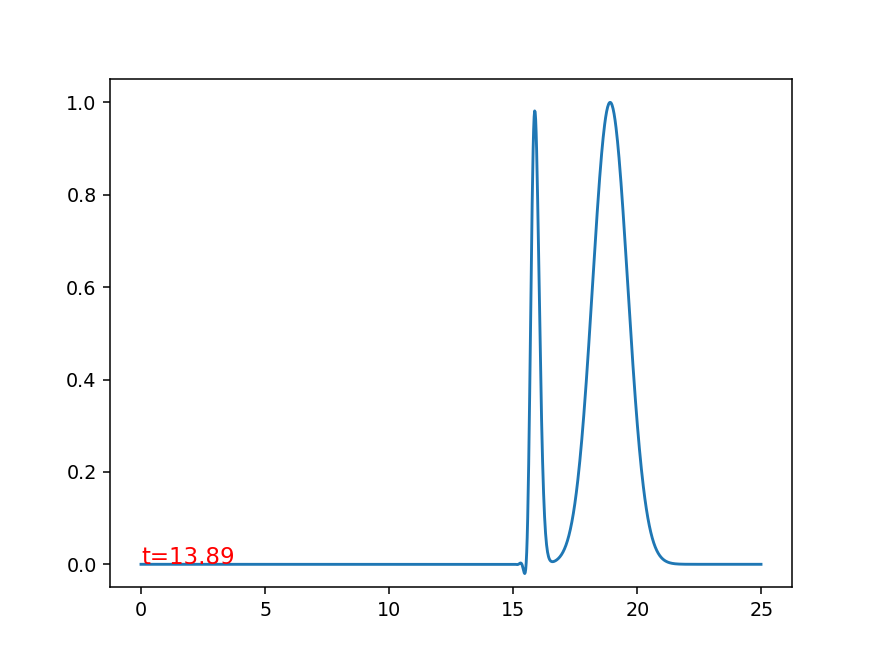

1065


In [16]:
%matplotlib notebook
import matplotlib.animation as animation
fig, ax = plt.subplots()

line, = ax.plot(x, U[0])
string = 't=0'
label = ax.text(0, 0, string, fontsize=12, color="Red")

def animate(i):
    line.set_ydata(U[i])  # update the data
    label.set_text('t=%1.2f'%(tiempo[i]))
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(U[0])
    return line,
print(M)
ani = animation.FuncAnimation(fig, animate, np.arange(1, M,4), init_func=init,
                              interval=200, blit=True)
plt.show()

In [42]:
I, a, u0 = problem_advection_2()
U, x, tiempo = Upwind(1250,I, a, u0, T=17, CFL=0.8)
M = 1065

<IPython.core.display.Javascript object>


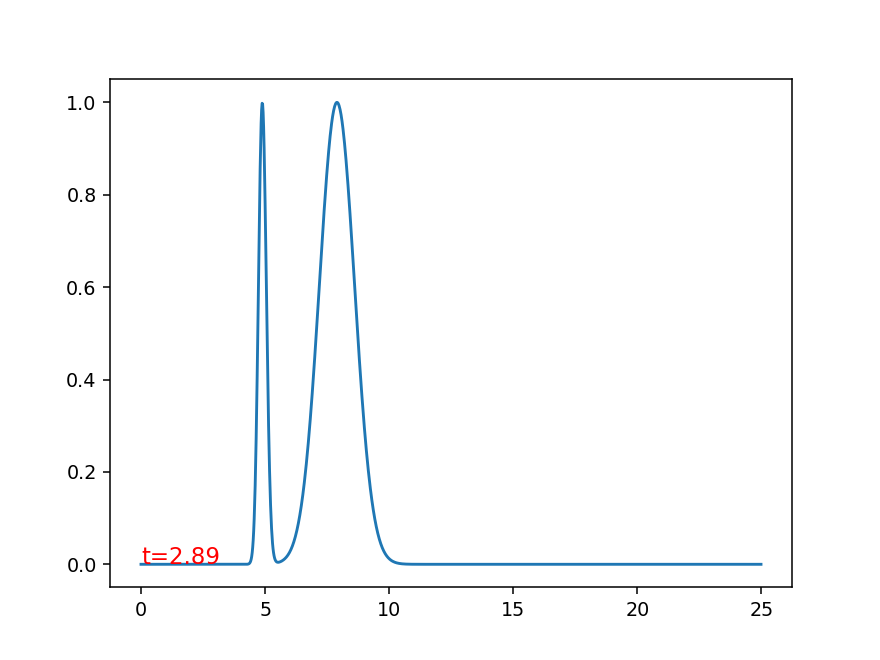

In [14]:
%matplotlib notebook
import matplotlib.animation as animation
fig, ax = plt.subplots()

line, = ax.plot(x, U[0])
string = 't=0'
label = ax.text(0, 0, string, fontsize=12, color="Red")

def animate(i):
    line.set_ydata(U[i])  # update the data
    label.set_text('t=%1.2f'%(tiempo[i]))
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(U[0])
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, M, 10), init_func=init,
                              interval=200, blit=True)
plt.show()

# Problem 3: Solucion discontinua

In [43]:
def problem_advection_3():
    # boundary value problem
    x0 = -1.0
    xN = 1.0
    a = 1.0
    u0 = lambda y: np.piecewise(y, [y < 0, y >= 0], [1.0, 0])
    g0 = lambda t: 1.0 + 0*t
    uexact = lambda x,t: u0(x-a*t)
    return [x0,xN], a, np.vectorize(u0), g0, np.vectorize(uexact)

In [8]:
def Lax_Friedrichs_bv(N,I, a, u0, g0, T=1, CFL=0.8):
    x = np.linspace(I[0], I[1], N, endpoint=False)
    h = (I[1]-I[0])/(N+1)
    
    dt = CFL*h/a
    U = []
    U0 = u0(x); U.append(U0)
    
    t = 0
    tiempo = []; tiempo.append(t)
    while t+dt/2 < T:
        Unext = np.zeros(N,dtype=np.float64)
        # j = 0
        Unext[0] = g0(t+dt)
        for j in range(1,N-1):
            Unext[j] = 0.5*(U0[j+1]+U0[j-1]) - (dt*a/2/h)*(U0[j+1]-U0[j-1])
        # j =N-1
        Unext[N-1] =  U0[N-1] - (dt*a/h)*(U0[N-1]-U0[N-2])
        U.append(Unext)
        t += dt
        tiempo.append(t)
        U0 = Unext
    return U,x, tiempo

In [10]:
def Lax_Wendroff_bv(N, I, a, u0, g0, T=1, CFL=0.8):
    x = np.linspace(I[0], I[1], N, endpoint=False)
    h = (I[1]-I[0])/(N+1)
    print(h)
    dt = CFL*h/a
    U = []
    U0 = u0(x); U.append(U0)
    
    t = 0
    tiempo = []; tiempo.append(t)
    while t+dt/2 < T:
        Unext = np.zeros(N,dtype=np.float64)
        # j = 0
        Unext[0] = g0(t+dt)
        for j in range(1,N-1):
            Unext[j] = U0[j] - (dt*a/2/h)*(U0[j+1]-U0[j-1]) + dt**2*a/2/h**2*(U0[j+1]-2*U0[j]+U0[j-1])
        # j =N-1
        Unext[N-1] = U0[N-1] - (dt*a/h)*(U0[N-1]-U0[N-2])
        U.append(Unext)
        t += dt
        tiempo.append(t)
        U0 = Unext
    return U, x, tiempo

In [11]:
def Upwind_bv(N,I, a, u0, g0, T=1, CFL=0.8):
    x = np.linspace(I[0], I[1], N, endpoint=False)
    h = (I[1]-I[0])/(N+1)
    
    dt = CFL*h/a
    U = []
    U0 = u0(x); U.append(U0)
    
    t = 0
    tiempo = []; tiempo.append(t)
    while t+dt/2 < T:
        Unext = np.zeros(N,dtype=np.float64)
        # j = 0
        Unext[0] = g0(t+dt)
        for j in range(1,N-1):
            Unext[j] = U0[j] - (dt*a/h)*(U0[j]-U0[j-1])
        # j =N-1
        Unext[N-1] = U0[N-1] - (dt*a/h)*(U0[N-1]-U0[N-2])
        U.append(Unext)
        t += dt
        tiempo.append(t)
        U0 = Unext
    return U, x, tiempo

In [20]:
I, a, u0, g0, uexact = problem_advection_3()
#print(u0([-1,0.5,1]))
U, x, tiempo = Upwind_bv(1000,I, a, u0, g0, T=0.5, CFL=0.5)
UE = [uexact(x, t) for t in tiempo]
M = 100
#print(U)

<IPython.core.display.Javascript object>


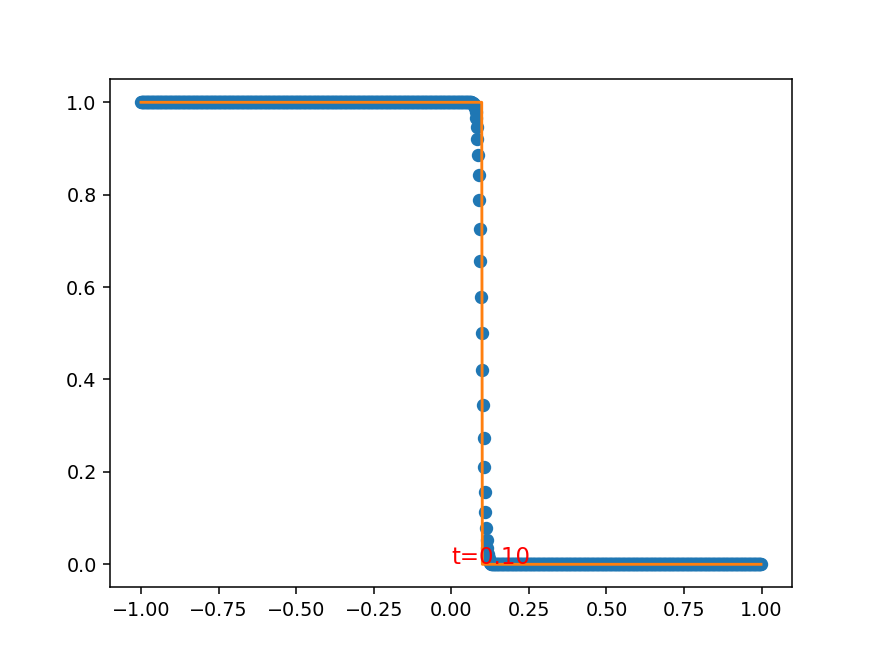

In [21]:
%matplotlib notebook
import matplotlib.animation as animation
fig, ax = plt.subplots()

circles, = ax.plot(x, U[0],'o')
line, = ax.plot(x, UE[0])
string = 't=0'
label = ax.text(0, 0, string, fontsize=12, color="Red")

def animate(i):
    circles.set_ydata(U[i])  # update the data
    line.set_ydata(UE[i])  # update the data
    label.set_text('t=%1.2f'%(tiempo[i]))
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(U[0])
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, M, 1), init_func=init,
                              interval=200, blit=True, repeat=False)
plt.show()

In [18]:
I, a, u0, g0, uexact = problem_advection_3()
#print(u0([-1,0.5,1]))
U, x, tiempo = Lax_Wendroff_bv(1001,I, a, u0, g0, T=0.5, CFL=0.5)
UE = [uexact(x, t) for t in tiempo]
M = 100
#print(U)

0.001996007984031936


<IPython.core.display.Javascript object>


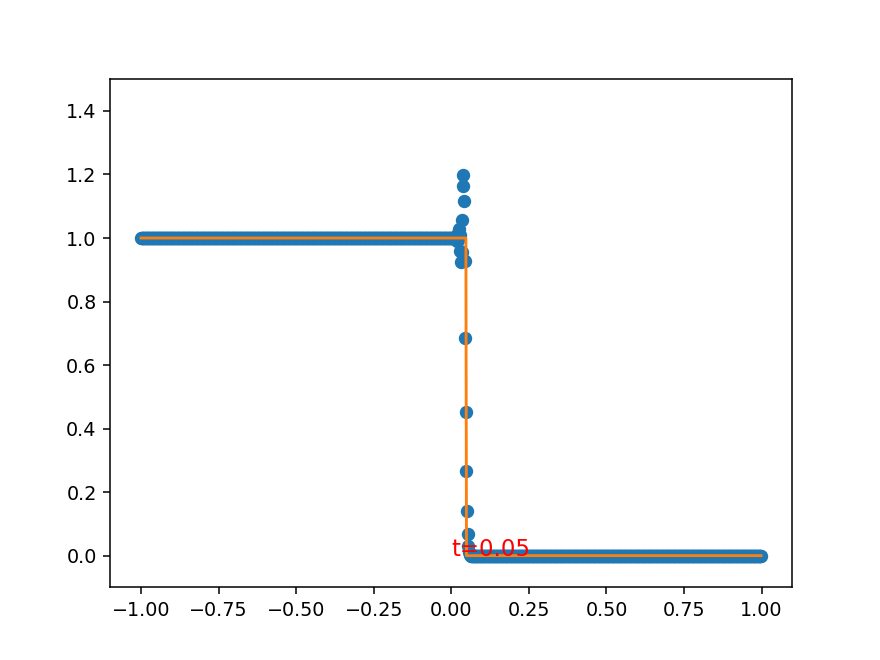

In [19]:
%matplotlib notebook
import matplotlib.animation as animation
fig, ax = plt.subplots()
ax.set(ylim=(-0.1, 1.5))
circles, = ax.plot(x, U[0],'o')
line, = ax.plot(x, UE[0])
string = 't=0'
label = ax.text(0, 0, string, fontsize=12, color="Red")

def animate(i):
    circles.set_ydata(U[i])  # update the data
    line.set_ydata(UE[i])  # update the data
    label.set_text('t=%1.2f'%(tiempo[i]))
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(U[0])
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, M, 1), init_func=init,
                              interval=200, blit=True, repeat=False)
plt.show()

# Problem 4: Burgers

In [5]:
def problem_Burgers_smooth():
    # boundary value problem
    x0 = 0
    xN = 8
    u0 = lambda x: np.exp(-(x-4)**2)
    g0 = lambda t: 0.0 + 0*t
    return [x0,xN], a, np.vectorize(u0), g0

def problem_Burgers_disc():
    # boundary value problem
    x0 = -1
    xN = 1
    ul = 1.2
    ur = 0.4
    u0 = lambda y: np.piecewise(y, [y < 0, y >= 0], [1.2, 0.4])
    g0 = lambda t: ul + 0*t
    s = (ul+ur)/2
    uexact = lambda x, t: u0(x-s*t)
    return [x0,xN], a, np.vectorize(u0), g0, np.vectorize(uexact)

In [22]:
def UpwindX_bv(N,I, a, u0, g0, T=1, CFL=0.8):
    x = np.linspace(I[0], I[1], N, endpoint=False)
    h = (I[1]-I[0])/(N+1)
    
    dt = CFL*h/a
    U = []
    U0 = u0(x); U.append(U0)
    
    t = 0
    tiempo = []; tiempo.append(t)
    while t+dt/2 < T:
        Unext = np.zeros(N,dtype=np.float64)
        # j = 0
        Unext[0] = g0(t+dt)
        for j in range(1,N-1):
            Unext[j] = U0[j] - (dt/h)*U0[j]*(U0[j]-U0[j-1])
        # j =N-1
        Unext[N-1] = U0[N-1] - (dt/h)*U0[j]*(U0[N-1]-U0[N-2])
        U.append(Unext)
        t += dt
        tiempo.append(t)
        U0 = Unext
    return U, x, tiempo

In [23]:
I, a, u0, g0= problem_Burgers_smooth()

U, x, tiempo = UpwindX_bv(401,I, a, u0, g0, T=2, CFL=0.5)
UE = [uexact(x, t) for t in tiempo]
M = 200
#print(U)

<IPython.core.display.Javascript object>


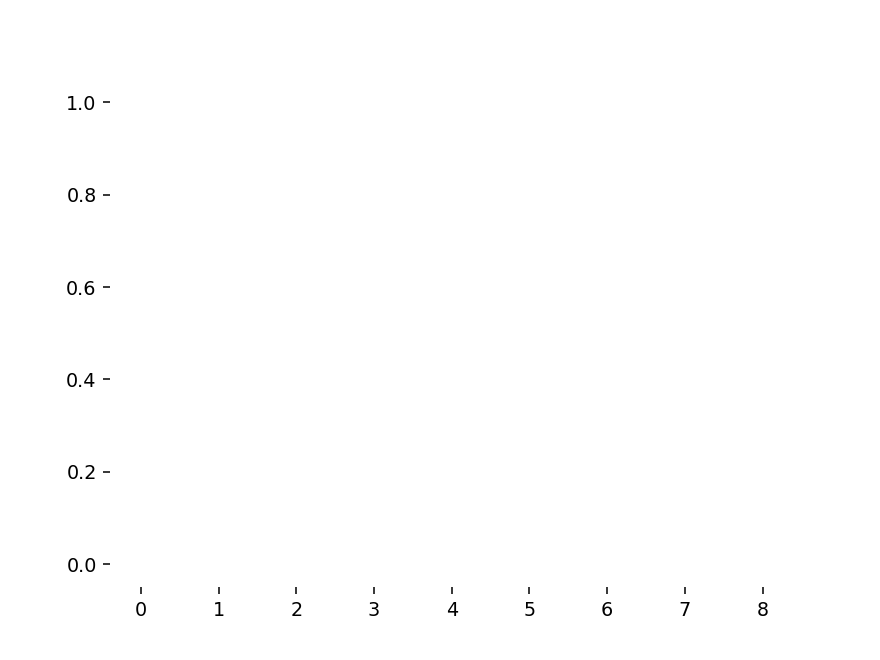

In [24]:
%matplotlib notebook
import matplotlib.animation as animation
fig, ax = plt.subplots()

line, = ax.plot(x, U[0])
string = 't=0'
label = ax.text(0, 0, string, fontsize=12, color="Red")

def animate(i):

    line.set_ydata(U[i])  # update the data
    label.set_text('t=%1.2f'%(tiempo[i]))
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(U[0])
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, M, 1), init_func=init,
                              interval=200, blit=True)
plt.show()

In [25]:
I, a, u0, g0, uexact = problem_Burgers_disc()
#print(u0([-1,0.5,1]))
U, x, tiempo = UpwindX_bv(201,I, a, u0, g0, T=1.0, CFL=0.5)
UE = [uexact(x, t) for t in tiempo]
M = 200

<IPython.core.display.Javascript object>


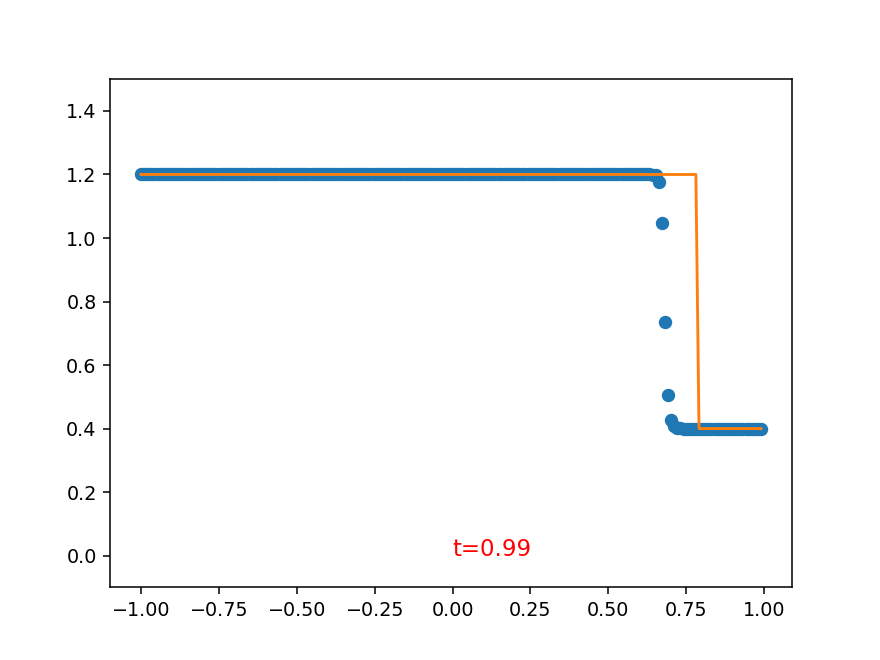

In [26]:
%matplotlib notebook
import matplotlib.animation as animation
fig, ax = plt.subplots()
ax.set(ylim=(-0.1, 1.5))
circles, = ax.plot(x, U[0],'o')
line, = ax.plot(x, UE[0])
string = 't=0'
label = ax.text(0, 0, string, fontsize=12, color="Red")

def animate(i):
    circles.set_ydata(U[i])  # update the data
    line.set_ydata(UE[i])  # update the data
    label.set_text('t=%1.2f'%(tiempo[i]))
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(U[0])
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, M, 1), init_func=init,
                              interval=200, blit=True, repeat=False)
plt.show()

In [34]:
def Upwind_conservative_bv(N,I, u0, g0, T=1, CFL=0.8):
    x = np.linspace(I[0], I[1], N)
    h = (I[1]-I[0])/(N+1)

    dt = CFL*h
    U = []
    U0 = u0(x); U.append(U0)
    
    U0[int(N/2)] = 0 # Trick for rarefaction
    
    t = 0
    tiempo = []; tiempo.append(t)
    # Burgers
    
    while t+dt/2 < T:
        Unext = np.zeros(N,dtype=np.float64)
        # j = 0
        Unext[0] = g0(t+dt)
        for j in range(1,N-1):
            
            F1 = flux_Burgers(U0[j], U0[j+1])
            F0 = flux_Burgers(U0[j-1], U0[j])
            Unext[j] = U0[j] - (dt/h)*(F1-F0)
        # j =N-1
        Unext[N-1] = U0[N-1] - (dt/h/2)*(U0[N-1]**2-U0[N-2]**2)
        U.append(Unext)
        t += dt
        tiempo.append(t)
        U0 = Unext
    return U, x, tiempo

def flux_Burgers(v,w):
    f = lambda u: u**2/2
    if v+w >= 0:
        return f(v)
    else:
        return f(w)

In [29]:
I, a, u0, g0, uexact = problem_Burgers_disc()
#print(u0([-1,0.5,1]))
U, x, tiempo = Upwind_conservative_bv(200,I, u0, g0, T=1.0, CFL=0.5)
UE = [uexact(x, t) for t in tiempo]
M = 200

<IPython.core.display.Javascript object>


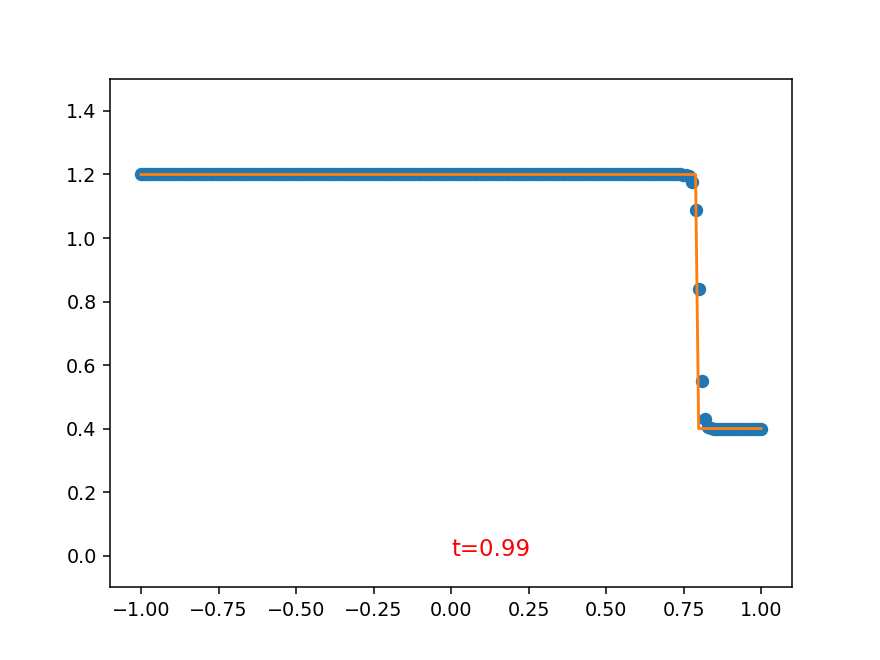

In [30]:
%matplotlib notebook
import matplotlib.animation as animation
fig, ax = plt.subplots()
ax.set(ylim=(-0.1, 1.5))
circles, = ax.plot(x, U[0],'o')
line, = ax.plot(x, UE[0])
string = 't=0'
label = ax.text(0, 0, string, fontsize=12, color="Red")

def animate(i):
    circles.set_ydata(U[i])  # update the data
    line.set_ydata(UE[i])  # update the data
    label.set_text('t=%1.2f'%(tiempo[i]))
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(U[0])
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, M, 1), init_func=init,
                              interval=200, blit=True, repeat=False)
plt.show()

# Problem 5: Burgers - entropy solution

In [31]:
def problem_Burgers_disc_2():
    # boundary value problem
    x0 = -1
    xN = 1
    ul = -1
    ur = 1
    uexact = lambda y, t: np.piecewise(y, [y-ul*t < 0, y-ul*t >= 0 and y-ur*t<0, y-ur*t>=0], [ul,lambda y: y/t, ur])
    g0 = lambda t: ul + 0*t
    s = (ul+ur)/2
    # rarefaction wave solution
    u0 = lambda y: np.piecewise(y, [y < 0, y >= 0], [ul, ur])
    #u0 = lambda y: np.piecewise(y, [y < 0, y ==0, y > 0], [ul,(ul+ur)/2, ur])
    return [x0,xN], np.vectorize(u0), g0, np.vectorize(uexact)

In [35]:
I,  u0, g0, uexact = problem_Burgers_disc_2()
#print(u0([-1,0.5,1]))
U, x, tiempo = Upwind_conservative_bv(201,I, u0, g0, T=1.0, CFL=0.5)

UE = [uexact(x, t) for t in tiempo]
M = 200
plt.plot(x, U[-1])

<IPython.core.display.Javascript object>


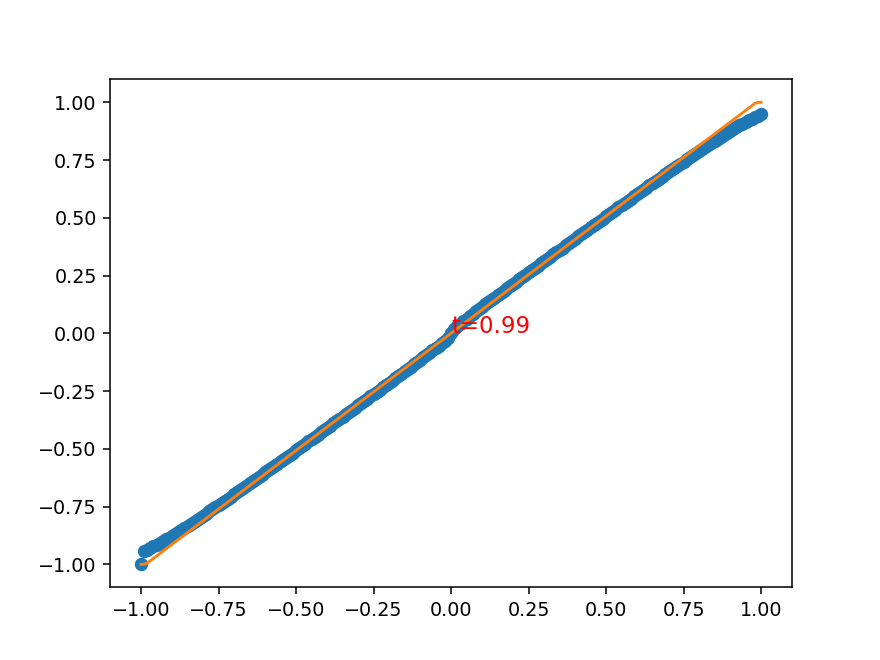

In [36]:
%matplotlib notebook
import matplotlib.animation as animation
fig, ax = plt.subplots()

circles, = ax.plot(x, U[0],'o')
line, = ax.plot(x, UE[0])
string = 't=0'
label = ax.text(0, 0, string, fontsize=12, color="Red")

def animate(i):
    circles.set_ydata(U[i])  # update the data
    line.set_ydata(UE[i])  # update the data
    label.set_text('t=%1.2f'%(tiempo[i]))
    return line, circles


# Init only required for blitting to give a clean slate.
def init():
    circles.set_ydata(U[0])
    line.set_ydata(UE[0])
    return line, circles

ani = animation.FuncAnimation(fig, animate, np.arange(1, M, 1), init_func=init,
                              interval=200, blit=True, repeat=False)
plt.show()